# 测试看看到底是哪些syndrome，我的方法解码错误，而Tesseract方法解码正确

In [1]:
# from typing import List
# import numpy as np

# def parse_01(data: str) -> List[List[bool]]:
#     shots = []
#     for line in data.split('\n'):
#         if not line:
#             continue
#         shot = []
#         for c in line:
#             assert c in '01'
#             shot.append(c == '1')
#         shots.append(shot)
#     return shots

# from epmld.benchmark.utility import generate_syndrome_and_observables

# logical_error_rates = []
# # nkds = [[72,12,6], [90,8,10], [108,8,10],[144,12,12]]
# # d_list = [3,5,7,9]
# d_list = [9]
# # error_types = ["X", "Z"]
# # error_types = ["X"]
# error_types = ["Z"]

# p = 10
# noise_model = "si1000"
# data_path = "/home/normaluser/ck/epmld/data/external/epmld_experiment_data/epmld_paper_experiment/overall_performance/surface_code"
# have_stabilizer = False

# import epmld
# # 使用EAMLD方法。
# priority = 0
# priority_topk = None
# approximate_param = 200
# approximatestrategy = "hyperedge_topk"
# related_path = "/home/normaluser/ck/epmld/data/external/epmld_experiment_data/epmld_paper_experiment/overall_performance/surface_code"

# from epmld.benchmark import generate_detector_error_model

# diff = {}
# diff_haming = {}

# epmld_decode_distribution = {}

# tesseract_decode_distribution = {}

# for d in d_list:
#     for error_type in error_types:
#         # r_list = [1, d]
#         r_list = [d]
#         for r in r_list:
            
#             dem = generate_detector_error_model(d = d, r=r, p=p, noise_model=noise_model,
#                                                 error_type=error_type, decomposed_error = False,
#                                                 related_path=data_path, have_stabilizer = have_stabilizer)
#             decoder =  epmld.EPMLD(detector_error_model=dem,
#                                         order_method='greedy',
#                                         slice_method='no_slice',
#                                         use_approx = True,
#                                         approximatestrategy = approximatestrategy,
#                                         approximate_param = approximate_param,
#                                         contraction_code = "qldpc-new-priority",
#                                         accuracy = "float64",
#                                         priority = priority,
#                                         priority_topk = priority_topk)
            
#             syndrome, actual_observables = generate_syndrome_and_observables(d, r, p, noise_model,
#                                                                                    error_type, data_path, have_stabilizer)
#             epmld_prediction = decoder.parallel_decode_batch(syndrome)
#             print("finish decode")
            
#             path_file = f"/home/normaluser/ck/epmld/experiment/tesseract_experiment/surface_code_result/{error_type}/decoded_surface_si1000_p{p}_d{d}_r{r}_no_stabilizer.01"
#             with open(path_file, 'r') as f:
#                 pre_data = f.read()
#             tesseract_prediction = parse_01(str(pre_data))
            
#             # logical_error_rate = np.sum(np.any(np.array(tesseract_prediction) != actual_observables, axis = 1)) / actual_observables.shape[0]
#             for i in range(len(syndrome)):
#                 if i%10000:
#                     print("i:", i)
#                 len_syndrome = np.sum(syndrome[i])
                
#                 if tesseract_prediction[i][0] == actual_observables[i][0] and epmld_prediction[i][0] != actual_observables[i][0]:
#                     diff[tuple(syndrome[i])] = diff.get(tuple(syndrome[i]), 0) + 1
#                     diff_haming[len_syndrome] = diff_haming.get(len_syndrome, 0) + 1
#                     # print(len_syndrome, tesseract_prediction[i], epmld_prediction[i], actual_observables[i])
                
#                 if tesseract_prediction[i][0] != actual_observables[i][0]:
#                     tesseract_decode_distribution[len_syndrome] = tesseract_decode_distribution.get(len_syndrome, 0) + 1
                
#                 if epmld_prediction[i][0] != actual_observables[i][0]:
#                     epmld_decode_distribution[len_syndrome] = epmld_decode_distribution.get(len_syndrome, 0) + 1
#             # logical_error_rates.append(logical_error_rate)
#             # print(f"d: {d}, error_type: {error_type}, r: {r}, logical_error_rate: {logical_error_rate}")

In [2]:
# diff

In [3]:
# diff_haming

In [4]:
# import matplotlib.pyplot as plt
# import numpy as np

# data = tesseract_decode_distribution

# # 准备数据
# x = list(data.keys())
# y = list(data.values())

# # 创建柱状图
# plt.figure(figsize=(15, 6))
# bars = plt.bar(x, y, color='skyblue')

# # 添加标签和标题
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.title('Tesseract Decode Distribution')
# plt.xticks(rotation=45)

# # 显示数值标签（只显示较大的值）
# for bar in bars:
#     height = bar.get_height()
#     if height > 50:  # 只在高柱上显示标签
#         plt.text(bar.get_x() + bar.get_width()/2., height,
#                  f'{int(height)}',
#                  ha='center', va='bottom', fontsize=8)

# plt.tight_layout()
# plt.show()

In [5]:
# import matplotlib.pyplot as plt
# import numpy as np

# data = epmld_decode_distribution

# # 准备数据
# x = list(data.keys())
# y = list(data.values())

# # 创建柱状图
# plt.figure(figsize=(15, 6))
# bars = plt.bar(x, y, color='skyblue')

# # 添加标签和标题
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.title('EPMLD Decode Distribution')
# plt.xticks(rotation=45)

# # 显示数值标签（只显示较大的值）
# for bar in bars:
#     height = bar.get_height()
#     if height > 50:  # 只在高柱上显示标签
#         plt.text(bar.get_x() + bar.get_width()/2., height,
#                  f'{int(height)}',
#                  ha='center', va='bottom', fontsize=8)

# plt.tight_layout()
# plt.show()

In [6]:
# import matplotlib.pyplot as plt
# import numpy as np

# data = {k: epmld_decode_distribution.get(k,0) - tesseract_decode_distribution.get(k,0) for k in epmld_decode_distribution}

# # 准备数据
# x = list(data.keys())
# y = list(data.values())

# # 创建柱状图
# plt.figure(figsize=(15, 6))
# bars = plt.bar(x, y, color='skyblue')

# # 添加标签和标题
# plt.xlabel('Value')
# plt.ylabel('Frequency')
# plt.title('diff EPMLD Decode Distribution and Tesseract Decode Distribution')
# plt.xticks(rotation=45)

# # 显示数值标签（只显示较大的值）
# for bar in bars:
#     height = bar.get_height()
#     # if height > 10:  # 只在高柱上显示标签
#     plt.text(bar.get_x() + bar.get_width()/2., height,
#                 f'{int(height)}',
#                 ha='center', va='bottom', fontsize=8)

# plt.tight_layout()
# plt.show()

对于某些中等规模的部分，出错的概率更大。

# QLDPC

In [7]:
from typing import List
import numpy as np

def parse_01(data: str) -> List[List[bool]]:
    shots = []
    for line in data.split('\n'):
        if not line:
            continue
        shot = []
        for c in line:
            assert c in '01'
            shot.append(c == '1')
        shots.append(shot)
    return shots

from epmld.benchmark.utility import generate_qldpc_syndrome_and_observables, generate_qldpc_detector_error_model

from epmld.benchmark import generate_qldpc_detector_error_model, LogicalErrorRateBenchmark, generate_qldpc_detector_error_model_path
# 设置 logging 配置，放在模块级别

from epmld import EAMLDCpp_from_file

logical_error_rates = []
# nkds = [[72,12,6]]
nkds = [[144,12,12]]
# d_list = [3,5,7,9]
# d_list = [9]
# error_types = ["X", "Z"]
error_types = ["X"]
# error_types = ["Z"]


p = 10
noise_model = "si1000"
data_path = "/home/normaluser/ck/epmld/data/external/epmld_experiment_data/epmld_paper_experiment/overall_performance/qldpc_code"
have_stabilizer = False

import epmld
# 使用EAMLD方法。
priority = 0
priority_topk = 1000
approximate_param = 1000
approximatestrategy = "hyperedge_topk"
related_path = "/home/normaluser/ck/epmld/data/external/epmld_experiment_data/epmld_paper_experiment/overall_performance/qldpc_code"

from epmld.benchmark import generate_detector_error_model
import multiprocessing

diff = {}
diff_haming = {}

epmld_decode_distribution = {}

tesseract_decode_distribution = {}

for nkd in nkds:
    for error_type in error_types:
        # r_list = [1, d]
        d = nkd[2]
        
        r_list = [d]
        for r in r_list:

            dem = generate_qldpc_detector_error_model(nkd=nkd, r=r, p=p, noise_model=noise_model, 
                                                    error_type=error_type,related_path=data_path,
                                                    have_stabilizer = have_stabilizer)
            # decoder =  epmld.EPMLD(detector_error_model=dem,
            #                             order_method='greedy',
            #                             slice_method='no_slice',
            #                             use_approx = True,
            #                             approximatestrategy = approximatestrategy,
            #                             approximate_param = approximate_param,
            #                             contraction_code = "qldpc-new-priority",
            #                             accuracy = "float64",
            #                             priority = priority,
            #                             priority_topk = priority_topk)
            dem_file = generate_qldpc_detector_error_model_path(nkd=nkd, r=r, p=p, noise_model=noise_model, 
                                                error_type=error_type,related_path=related_path,
                                                have_stabilizer = have_stabilizer)
            decoder =  EAMLDCpp_from_file(dem_path=str(dem_file), 
                                            approx_strategy=str(approximatestrategy), 
                                            approx_param=float(approximate_param), 
                                            priority=int(priority), 
                                            priority_topk = int(priority_topk),
                                            use_heuristic = False, alpha = float(0.05))
            
            syndrome, actual_observables = generate_qldpc_syndrome_and_observables(nkd, r, p, noise_model,
                                                                                   error_type, data_path, have_stabilizer)
            print("start decode")
            thread_num = multiprocessing.cpu_count() -60
            epmld_prediction = decoder.parallel_decode_batch(syndrome, False, thread_num)
            print("finish decode")
            
            # path_file = f"/home/normaluser/ck/epmld/experiment/tesseract_experiment/surface_code_result/{error_type}/decoded_qldpc_si1000_p{p}_d{d}_r{r}_no_stabilizer.01"
            path_file = f"/home/normaluser/ck/epmld/experiment/tesseract_experiment/qldpc_code_result/{error_type}/decoded_qldpc_si1000_p10_n{nkd[0]}_k{nkd[1]}_d{nkd[2]}_r{r}_no_stabilizer_pre.01"
            with open(path_file, 'r') as f:
                pre_data = f.read()
            tesseract_prediction = parse_01(str(pre_data))
            
            # logical_error_rate = np.sum(np.any(np.array(tesseract_prediction) != actual_observables, axis = 1)) / actual_observables.shape[0]
            for i in range(len(syndrome)):
                # if i%10000:
                #     print("i:", i)
                len_syndrome = np.sum(syndrome[i])
                
                if tesseract_prediction[i][0] == actual_observables[i][0] and epmld_prediction[i][0] != actual_observables[i][0]:
                    diff[tuple(syndrome[i])] = diff.get(tuple(syndrome[i]), 0) + 1
                    diff_haming[len_syndrome] = diff_haming.get(len_syndrome, 0) + 1
                    # print(len_syndrome, tesseract_prediction[i], epmld_prediction[i], actual_observables[i])
                
                if tesseract_prediction[i][0] != actual_observables[i][0]:
                    tesseract_decode_distribution[len_syndrome] = tesseract_decode_distribution.get(len_syndrome, 0) + 1
                
                if epmld_prediction[i][0] != actual_observables[i][0]:
                    epmld_decode_distribution[len_syndrome] = epmld_decode_distribution.get(len_syndrome, 0) + 1
            # logical_error_rates.append(logical_error_rate)
            # print(f"d: {d}, error_type: {error_type}, r: {r}, logical_error_rate: {logical_error_rate}")

start decode
finish decode


In [8]:
a =[k for k,v in diff.items() if sum(k) ==96][0]

In [9]:
[i for i in range(len(a)) if int(a[i]) == 1]

[109,
 110,
 126,
 168,
 174,
 182,
 183,
 233,
 291,
 297,
 300,
 322,
 323,
 326,
 343,
 347,
 349,
 353,
 358,
 372,
 373,
 377,
 395,
 403,
 432,
 434,
 441,
 445,
 450,
 451,
 498,
 533,
 536,
 542,
 547,
 595,
 610,
 650,
 651,
 659,
 667,
 696,
 724,
 745,
 781,
 787,
 798,
 799,
 803,
 808,
 814,
 853,
 854,
 872,
 873,
 912,
 918,
 927,
 928,
 985,
 1007,
 1081,
 1122,
 1131,
 1134,
 1137,
 1144,
 1147,
 1195,
 1212,
 1217,
 1229,
 1234,
 1237,
 1243,
 1270,
 1273,
 1310,
 1343,
 1349,
 1352,
 1381,
 1390,
 1396,
 1403,
 1406,
 1412,
 1445,
 1447,
 1454,
 1495,
 1552,
 1554,
 1555,
 1561,
 1591]

In [10]:
import numpy as np

# 查找所有包含a的行索引
indices = np.where(np.all(syndrome == a, axis=1))[0]

In [11]:
indices

array([876])

In [12]:
tesseract_prediction[40]


[True, True, False, False, False, False, True, False, True, True, True, False]

In [13]:
epmld_prediction[40]

[True, True, False, False, False, False, True, False, True, True, True, False]

很容易预测为0

In [14]:
# tesseract_prediction[indices]

In [15]:
syndrome_distribution = {}
for i in range(len(syndrome)):
    len_syndrome = np.sum(syndrome[i])
    syndrome_distribution[len_syndrome] = syndrome_distribution.get(len_syndrome, 0) + 1

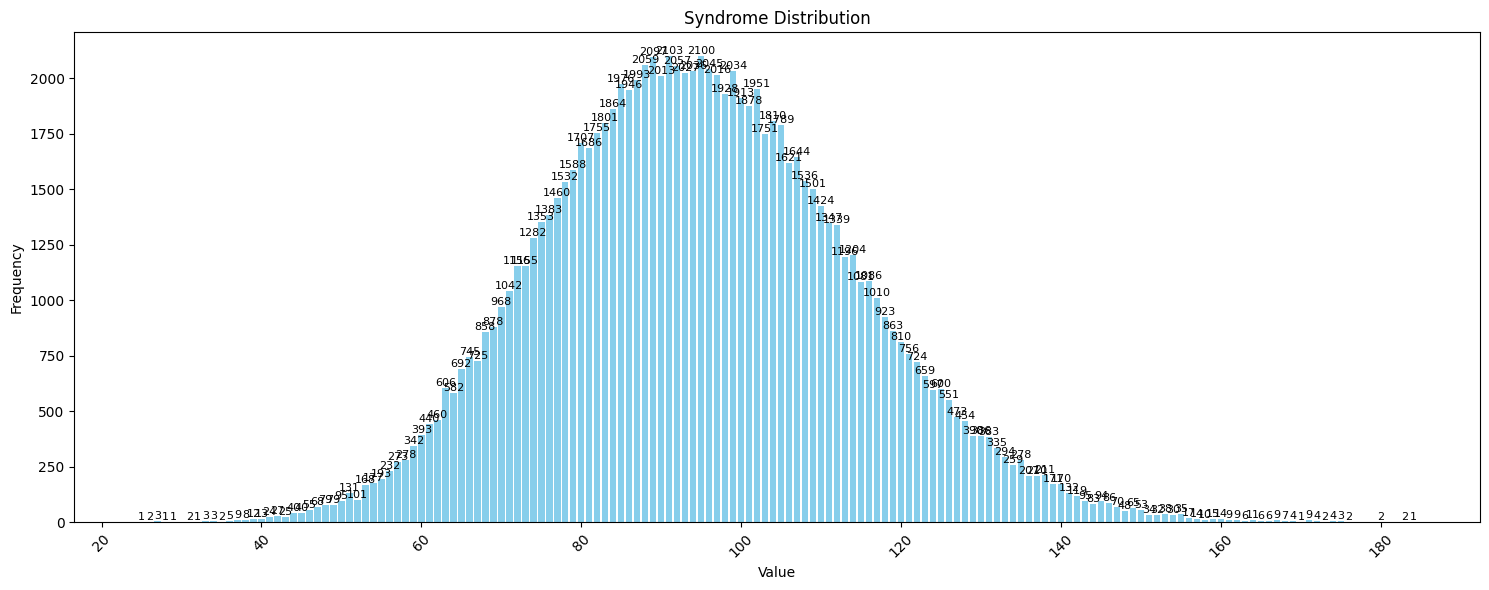

In [16]:
import matplotlib.pyplot as plt
import numpy as np

data = syndrome_distribution

# 准备数据
x = list(data.keys())
y = list(data.values())

# 创建柱状图
plt.figure(figsize=(15, 6))
bars = plt.bar(x, y, color='skyblue')

# 添加标签和标题
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Syndrome Distribution')
plt.xticks(rotation=45)

# 显示数值标签（只显示较大的值）
for bar in bars:
    height = bar.get_height()
    # if height > 10:  # 只在高柱上显示标签
    plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

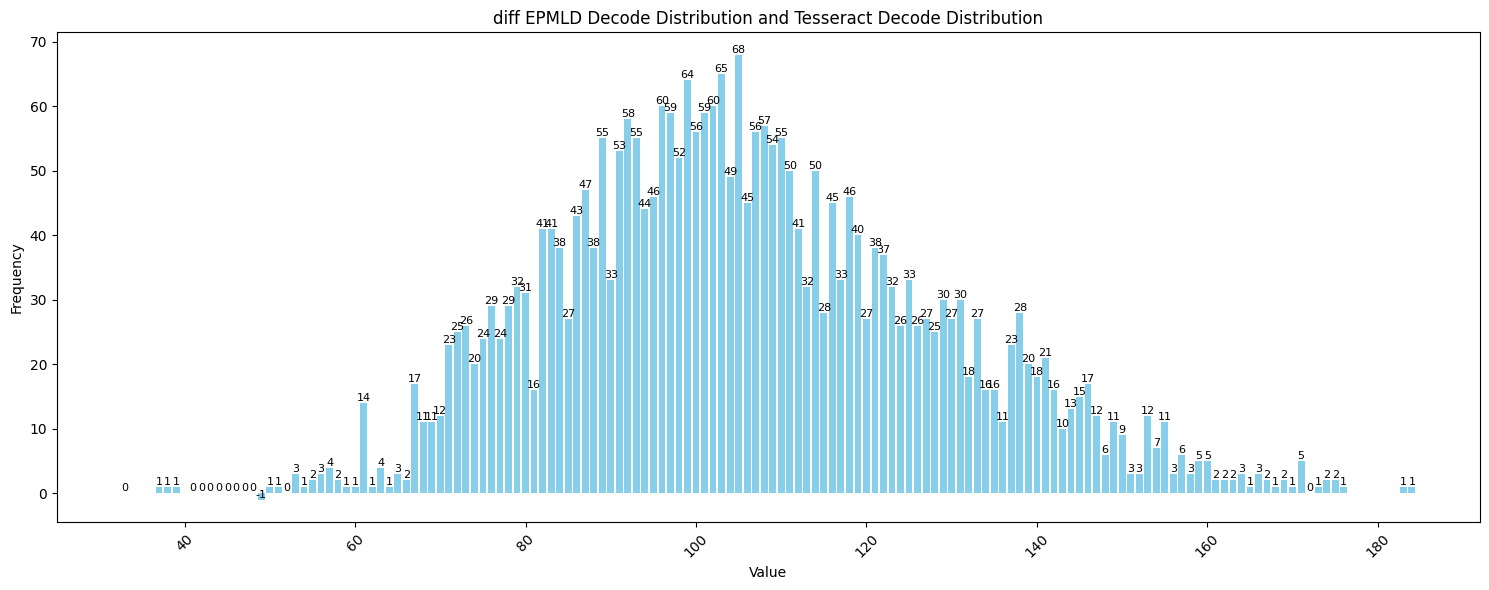

In [17]:
import matplotlib.pyplot as plt
import numpy as np

data = {k: epmld_decode_distribution.get(k,0) - tesseract_decode_distribution.get(k,0) for k in epmld_decode_distribution}

# 准备数据
x = list(data.keys())
y = list(data.values())

# 创建柱状图
plt.figure(figsize=(15, 6))
bars = plt.bar(x, y, color='skyblue')

# 添加标签和标题
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('diff EPMLD Decode Distribution and Tesseract Decode Distribution')
plt.xticks(rotation=45)

# 显示数值标签（只显示较大的值）
for bar in bars:
    height = bar.get_height()
    # if height > 10:  # 只在高柱上显示标签
    plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

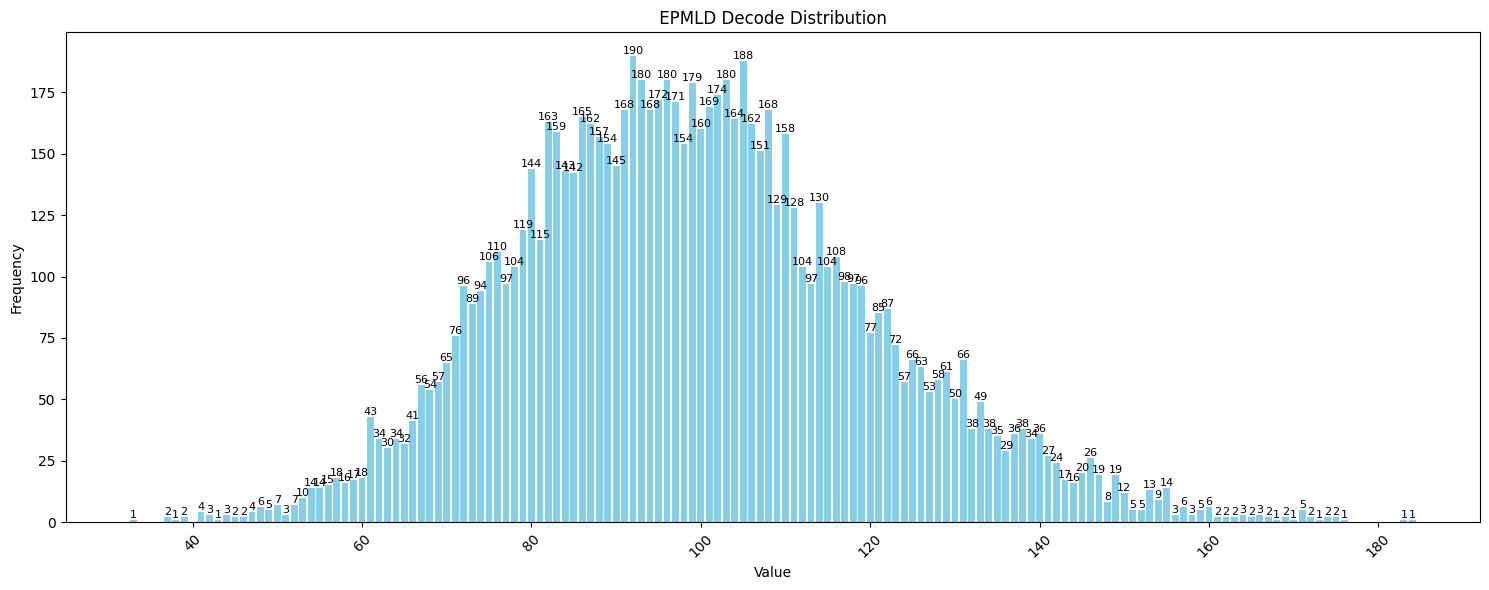

In [18]:
import matplotlib.pyplot as plt
import numpy as np

data = epmld_decode_distribution

# 准备数据
x = list(data.keys())
y = list(data.values())

# 创建柱状图
plt.figure(figsize=(15, 6))
bars = plt.bar(x, y, color='skyblue')

# 添加标签和标题
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(' EPMLD Decode Distribution ')
plt.xticks(rotation=45)

# 显示数值标签（只显示较大的值）
for bar in bars:
    height = bar.get_height()
    # if height > 10:  # 只在高柱上显示标签
    plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

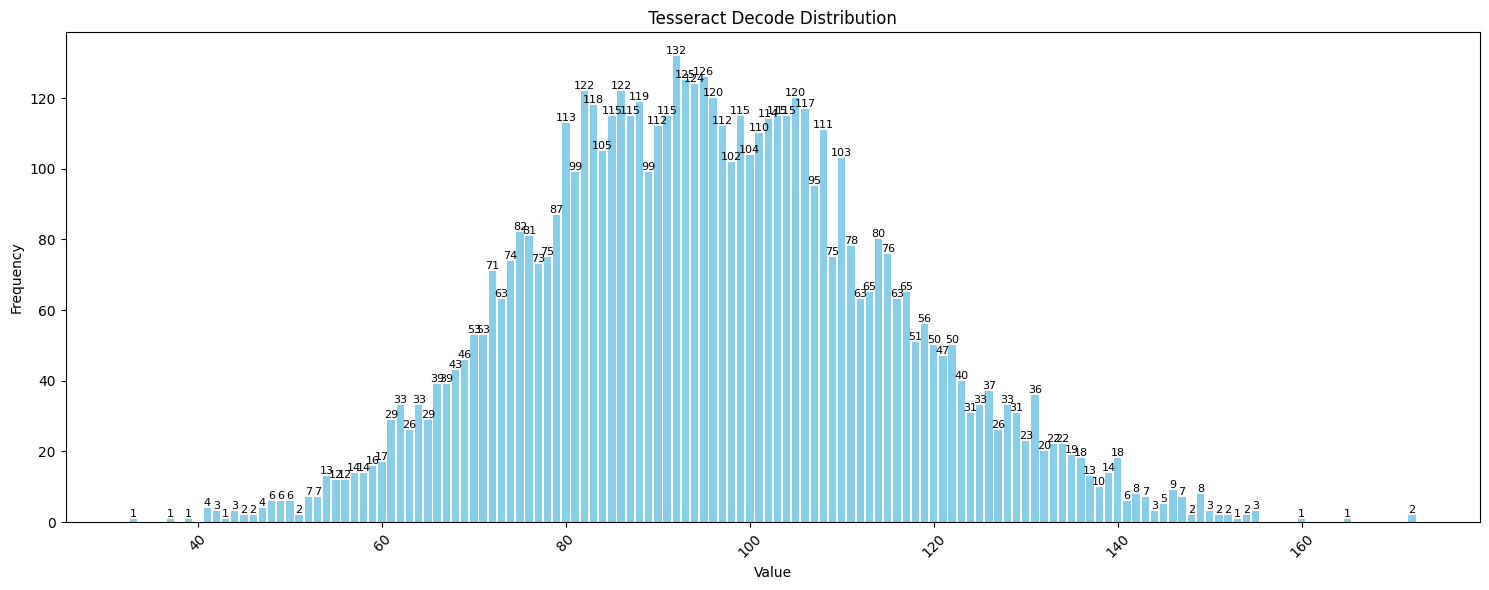

In [19]:
import matplotlib.pyplot as plt
import numpy as np

data = tesseract_decode_distribution

# 准备数据
x = list(data.keys())
y = list(data.values())

# 创建柱状图
plt.figure(figsize=(15, 6))
bars = plt.bar(x, y, color='skyblue')

# 添加标签和标题
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title(' Tesseract Decode Distribution ')
plt.xticks(rotation=45)

# 显示数值标签（只显示较大的值）
for bar in bars:
    height = bar.get_height()
    # if height > 10:  # 只在高柱上显示标签
    plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()